## Case study name: Credit Card Fraud Detection
### Anonymized credit card transactions labeled as fraudulent or genuine
#### Data source: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv(r"C:\Users\TINKU\Downloads\archive (1)\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# observations in each class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# balence the dataset
fraud = df[df['Class']==1]
non_fraud = df[df['Class']==0]

In [11]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

### we can see that dataset is totally imbalanced and we need to balance it

In [12]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [13]:
non_fraud_t.shape

(492, 31)

In [14]:
# merge dataset
df1 = fraud.append(non_fraud_t, ignore_index=True)

In [15]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [16]:
df1.shape

(984, 31)

In [18]:
df1['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

##### here we can see that data is balanced now

In [19]:
x = df1.drop(labels=['Class'], axis=1)

In [20]:
y = df1['Class']

In [21]:
x.shape, y.shape

((984, 30), (984,))

In [22]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [24]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
x_train

array([[-0.52453219, -0.45610568, -1.16426909, ...,  0.95663785,
        -3.24992705,  2.4622089 ],
       [-0.81503787,  0.5038069 , -0.09258657, ...,  0.46100119,
         0.64433905, -0.36735436],
       [-0.85182807,  0.18289967,  0.10547602, ...,  0.30063274,
         0.48981818, -0.36655437],
       ...,
       [ 1.75930121,  0.41906083, -0.63595784, ..., -0.18368708,
        -0.12970189, -0.16989025],
       [ 1.36443912,  0.80696935, -0.53220718, ..., -0.22122237,
        -0.2313446 , -0.36558771],
       [-0.90887984,  0.64512888, -0.51031211, ..., -0.11383857,
        -0.0714448 , -0.29702194]])

In [26]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [27]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [28]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [29]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

#### as we done with data preprocessing , now we are good to build model

In [30]:
# defining an object
model = tf.keras.models.Sequential()

In [31]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape = (30, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [32]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [33]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [34]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [35]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0

In [37]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [38]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

#### as the model is built with 2 convolution and fully connected layer, now we can train the model

In [47]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 0s 9ms/step - loss: 0.2309 - accuracy: 0.9187 - val_loss: 0.1633 - val_accuracy: 0.9442
Epoch 2/25
25/25 [==============================] - 0s 7ms/step - loss: 0.2224 - accuracy: 0.9327 - val_loss: 0.1604 - val_accuracy: 0.9442
Epoch 3/25
25/25 [==============================] - 0s 7ms/step - loss: 0.2108 - accuracy: 0.9199 - val_loss: 0.1577 - val_accuracy: 0.9492
Epoch 4/25
25/25 [==============================] - 0s 7ms/step - loss: 0.1994 - accuracy: 0.9263 - val_loss: 0.1530 - val_accuracy: 0.9492
Epoch 5/25
25/25 [==============================] - 0s 7ms/step - loss: 0.2314 - accuracy: 0.9123 - val_loss: 0.1516 - val_accuracy: 0.9492
Epoch 6/25
25/25 [==============================] - 0s 7ms/step - loss: 0.2133 - accuracy: 0.9187 - val_loss: 0.1510 - val_accuracy: 0.9492
Epoch 7/25
25/25 [==============================] - 0s 8ms/step - loss: 0.2113 - accuracy: 0.9276 - val_loss: 0.1543 - val_accuracy: 0.9492
Epoch 8/25
25/25 [==

In [40]:
# model predictions
y_pred = model.predict_classes(x_test)

C:\Users\TINKU\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
print(y_pred[23]), print(y_test[23])

[0]
0


(None, None)

In [42]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   1]
 [  9  82]]


In [48]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.949238578680203


#### Lets look at the learning curve of the model

In [49]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

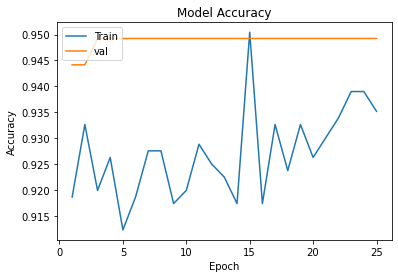

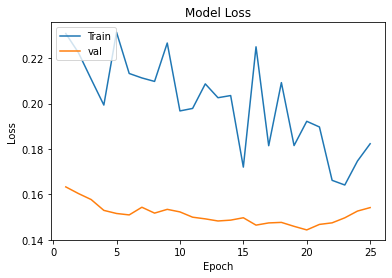

In [50]:
learning_curve(history, 25)